<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [ ]:
#Some Initial numbers and insights on the dataset

Text(-3, 10, 'Most common run time: 94')

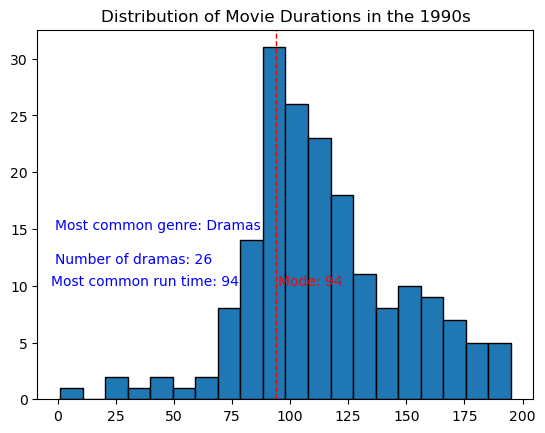

In [30]:
# Start coding here! Use as many cells as you like
# most common duration of movies released in the 1990s
netflix_1990 = netflix_df[(netflix_df['release_year'] >= 1990) & (netflix_df['release_year'] <= 1999)]
netflix_1990
duration = netflix_1990['duration'].mode() [0]
duration

#create a histogram of the duration of movies released in the 1990s
plt.hist(netflix_1990['duration'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')

#color the mode in red
plt.axvline(duration, color='red', linestyle='dashed', linewidth=1)
plt.text(duration + 1, 10, f'Mode: {duration}', color='red')


#now lets create a dataframe of the most common year of release that had a running time of 90 minutes
netflix_90 = netflix_df[netflix_df['duration'] == 90]


#find mode of of genre for movies with 90 minutes duration from netflix_90
genre = netflix_90['genre'].mode()[0]

#count number of dramas with 90 minutes duration, put it below the histogram
plt.text(-1, 15, f'Most common genre: {genre}', color='blue')
drama_count = netflix_90[netflix_90['genre'] == genre].shape[0]
plt.text(-1, 12, f'Number of dramas: {drama_count}', color='blue') 
plt.text(-3, 10, f'Most common run time: {duration}', color='blue') 


In [23]:
print(drama_count)


action = netflix_1990[netflix_1990['genre'] == "Action"]
action
short_movie_count = len(action[action['duration'] < 90])
short_movie_count

26


7